In [23]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
t_c = [0.5,14.0,15.0,28.0,11.0,8.0,3.0,-4.0,6.0,13.0,21.0]
t_u = [35.7,55.9,58.2,81.9,56.3,48.9,33.9,21.8,48.4,60.4,68.4]

def normalization(X): # input tensor, output normalized tensor
    X_min,X_max = X.min(),X.max()
    new_min, new_max = 0, 1
    X_n = (X-X_min)/((X_max - X_min)*(new_max - new_min)+new_min)
    return X_n

    

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_cn = normalization(t_c)
t_un = normalization(t_u)




In [24]:
def model(t_u,w2,w1,b): # forward pass, returns the value t_p
    return w2*(t_u**2)+w1*t_u+b

def loss(t_p,t_c): # loss calculation 
    squared_diffs = (t_p-t_c)**2
    return squared_diffs.mean()

weights = torch.tensor([1.0,1.0,0.0],requires_grad = True)

def training_loop(iterations,learning_rate,t_u,t_c,weights):
    for epoch in range(iterations+1):
        L = loss(model(t_u,*weights),t_c)
        L.backward()
        
        with torch.no_grad():
            weights -= learning_rate *weights.grad
            
       
        if epoch % 500 ==0:
            print('Epoch %d, Loss %f' % (epoch,float(L)))
    
    fig = plt.figure(figsize =(2,3))
    plt.plot(t_u,t_c,'ro')
    plt.plot(t_u,model(t_u,*weights).detach().numpy() )
    plt.title(f'temperature non-linear linear regression model with learning rate {learning_rate:.4f}')
    plt.xlabel('Fahrenheit')
    plt.ylabel('celsius')
    return weights
    

Epoch 0, Loss 0.206668
Epoch 500, Loss 0.216073
Epoch 1000, Loss 0.203958
Epoch 1500, Loss 0.171789
Epoch 2000, Loss 0.126865
Epoch 2500, Loss 0.077982
Epoch 3000, Loss 0.035679
Epoch 3500, Loss 0.008773
Epoch 4000, Loss 0.002751
Epoch 4500, Loss 0.019313
Epoch 5000, Loss 0.054366




Epoch 0, Loss 0.014421
Epoch 500, Loss 0.029790
Epoch 1000, Loss 0.005882
Epoch 1500, Loss 0.018495
Epoch 2000, Loss 0.027118
Epoch 2500, Loss 0.010747
Epoch 3000, Loss 0.018738
Epoch 3500, Loss 0.014762
Epoch 4000, Loss 0.029790
Epoch 4500, Loss 0.005026
Epoch 5000, Loss 0.019820




Epoch 0, Loss 0.017779
Epoch 500, Loss 0.007261
Epoch 1000, Loss 0.010051
Epoch 1500, Loss 0.011533
Epoch 2000, Loss 0.011488
Epoch 2500, Loss 0.011360
Epoch 3000, Loss 0.005682
Epoch 3500, Loss 0.017374
Epoch 4000, Loss 0.008880
Epoch 4500, Loss 0.005057
Epoch 5000, Loss 0.019023




Epoch 0, Loss 0.018954
Epoch 500, Loss 0.007356
Epoch 1000, Loss 0.004855
Epoch 1500, Loss 0.016898
Epoch 2000, Loss 0.010608
Epoch 2500, Loss

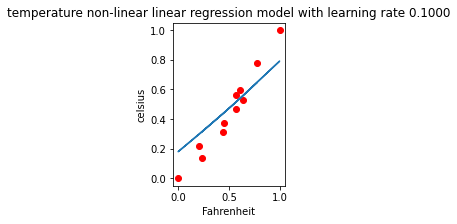

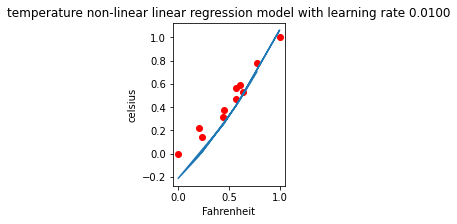

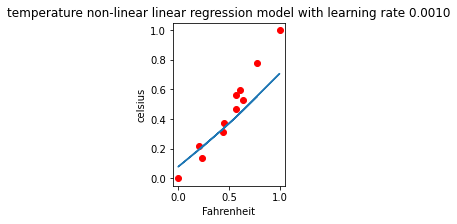

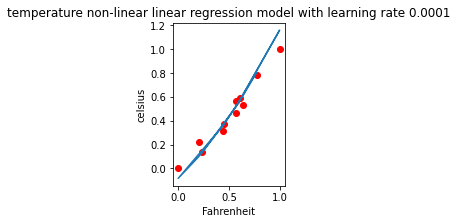

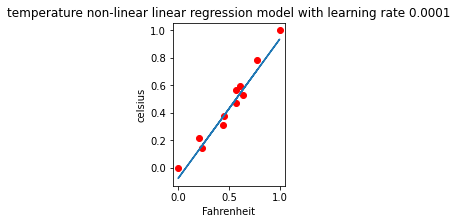

In [25]:
w = training_loop(5000,0.1,t_un,t_cn,weights)

print('\n\n\n')
w = training_loop(5000,0.01,t_un,t_cn,weights)

print('\n\n\n')
w = training_loop(5000,0.001,t_un,t_cn,weights)

print('\n\n\n')
w = training_loop(5000,0.0001,t_un,t_cn,weights)

print('\n\n\n')
def model(t_u,w1,b):
    return w1*t_u + b
weights = torch.tensor([1.0,0.0],requires_grad = True)
w = training_loop(5000,0.0001,t_un,t_cn,weights)
print('\n\n\n')

In [26]:
#best of slides = 2.927646, best of non-linear = 0.0001 (bottom)
#problem 2
df = pd.read_csv("Housing.csv")
xnum = ['area','bedrooms','bathrooms','stories','parking']
y = df['price'].values #t_c
x = df[xnum]
x0 = np.ones((len(y),1))

X= np.hstack((x,x0)) #t_u


X = normalization(X)
y = normalization(y)

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size = 0.2,shuffle = True)

#std = StandardScaler()
#sXtrain = std.fit_transform(Xtrain)
#sXtest = std.transform(Xtest)

sXtrain = torch.from_numpy(Xtrain.astype(np.float32))
sXtest = torch.from_numpy(Xtest.astype(np.float32))
Ytrain = torch.from_numpy(Ytrain.astype(np.float32))
Ytest = torch.from_numpy(Ytest.astype(np.float32))

Ytrain = Ytrain.view(Ytrain.shape[0],1) #reshape ytrain to be 1 column rather than 1 row
Ytest = Ytest.view(Ytest.shape[0],1)

weights = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0],requires_grad = True)

Epoch 0, Loss 0.432396
accuracy = 0.0000
Epoch 500, Loss 0.136500
accuracy = 0.0000
Epoch 1000, Loss 0.131789
accuracy = 0.0000
Epoch 1500, Loss 0.433029
accuracy = 0.0000
Epoch 2000, Loss 0.097269
accuracy = 0.0000
Epoch 2500, Loss 0.175498
accuracy = 0.0000
Epoch 3000, Loss 0.422859
accuracy = 0.0000
Epoch 3500, Loss 0.065052
accuracy = 0.0000
Epoch 4000, Loss 0.222080
accuracy = 0.0000
Epoch 4500, Loss 0.402428
accuracy = 0.0000
Epoch 5000, Loss 0.041561
accuracy = 0.0000




Epoch 0, Loss 0.068738
accuracy = 0.0000
Epoch 500, Loss 0.054451
accuracy = 0.0000
Epoch 1000, Loss 0.081946
accuracy = 0.0000
Epoch 1500, Loss 0.042262
accuracy = 0.0000
Epoch 2000, Loss 0.093055
accuracy = 0.0000
Epoch 2500, Loss 0.032389
accuracy = 0.0000
Epoch 3000, Loss 0.101213
accuracy = 0.0000
Epoch 3500, Loss 0.026477
accuracy = 0.0000
Epoch 4000, Loss 0.104708
accuracy = 0.0000
Epoch 4500, Loss 0.025207
accuracy = 0.0000
Epoch 5000, Loss 0.103896
accuracy = 0.0000




Epoch 0, Loss 0.103014
accuracy 

tensor([-0.0765, -0.0765, -0.0765, -0.0765, -0.0765,  0.2822],
       requires_grad=True)

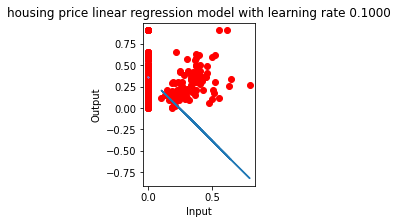

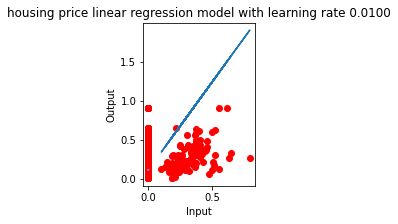

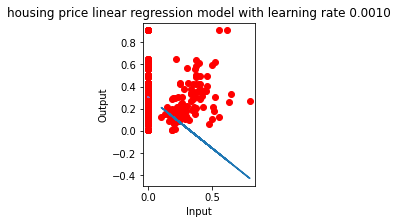

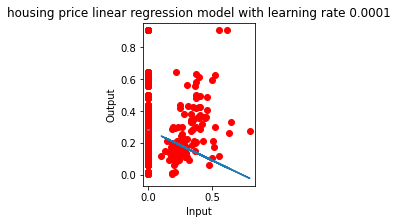

In [27]:
def model_p2(t_u,w5,w4,w3,w2,w1,b): # forward pass, returns the value t_p
    return w5*t_u+w4*t_u+w3*t_u+w2*t_u+w1*t_u+b

def training_loop_p2(iterations,learning_rate,t_u,t_c,xtest,ytest,weights):
    for epoch in range(iterations+1):
        L = loss(model_p2(t_u,*weights),t_c)
        L.backward()
        
        with torch.no_grad():
            weights -= learning_rate *weights.grad
        
       
        if epoch % 500 ==0:
            print('Epoch %d, Loss %f' % (epoch,float(L)))
            with torch.no_grad():
                y_predicted = model_p2(sXtest,*weights)
                
    fig = plt.figure(figsize =(2,3))
    plt.plot(xtest,ytest,'ro')
    plt.plot(xtest,y_predicted )
    plt.title(f'housing price linear regression model with learning rate {learning_rate:.4f}')
    plt.xlabel('Input')
    plt.ylabel('Output')
    return weights



model_p2(sXtrain,*weights)
training_loop_p2(5000,0.1,sXtrain,Ytrain,sXtest,Ytest,weights)
print('\n\n\n')
training_loop_p2(5000,0.01,sXtrain,Ytrain,sXtest,Ytest,weights)
print('\n\n\n')
training_loop_p2(5000,0.001,sXtrain,Ytrain,sXtest,Ytest,weights)
print('\n\n\n')
training_loop_p2(5000,0.0001,sXtrain,Ytrain,sXtest,Ytest,weights)

In [133]:
#best is 0.0001, 
#problem 3
import time


#sXtrain
#sXtest
#Ytrain
#Ytest 

n_samples, n_features = X.shape

input_size = n_features
output_size = 1

model = nn.Sequential(nn.Linear(6,8),nn.Tanh(),nn.Linear(8,1))

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 1e-3)

num_epoch = 200

def training_loop_p3(num_epoch,model,loss,optimizer,xtrain,xtest,ytrain,ytest,n_samples):
  t0 = time.time()
  for epoch in range(1,num_epoch+1):
    y_pred = model(xtrain)
    l = loss(ytrain,y_pred)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 20 ==0:
      print(f'epoch = {epoch},loss = {l:.8f}')
      print(f'validation loss = {loss(ytest,model(xtest))}')
      print('\n\n\n')
  print(f'training time = {time.time()-t0}')
training_loop_p3(num_epoch,model,criterion,optimizer,sXtrain,sXtest,Ytrain,Ytest,n_samples)
print('\n\n MODEL WITH TWO MORE HIDDEN LAYERS \n\n')
model = nn.Sequential(nn.Linear(6,8),nn.Tanh(),nn.Linear(8,8),nn.Tanh(),nn.Linear(8,2),nn.Tanh(),nn.Linear(2,1))
training_loop_p3(num_epoch,model,criterion,optimizer,sXtrain,sXtest,Ytrain,Ytest,n_samples)

epoch = 20,loss = 0.04603867
validation loss = 0.05532383173704147




epoch = 40,loss = 0.04408385
validation loss = 0.053174298256635666




epoch = 60,loss = 0.04231744
validation loss = 0.05122235417366028




epoch = 80,loss = 0.04072124
validation loss = 0.04944941774010658




epoch = 100,loss = 0.03927884
validation loss = 0.04783865436911583




epoch = 120,loss = 0.03797539
validation loss = 0.0463748537003994




epoch = 140,loss = 0.03679749
validation loss = 0.045044250786304474




epoch = 160,loss = 0.03573302
validation loss = 0.0438343808054924




epoch = 180,loss = 0.03477104
validation loss = 0.04273396357893944




epoch = 200,loss = 0.03390167
validation loss = 0.0417327880859375




training time = 0.11670804023742676


 MODEL WITH TWO MORE HIDDEN LAYERS 


epoch = 20,loss = 0.16149703
validation loss = 0.15607543289661407




epoch = 40,loss = 0.16149703
validation loss = 0.15607543289661407




epoch = 60,loss = 0.16149703
validation loss = 0.15607543289661407
